In [2]:
import pandas as pd
import pickle
import networkx as nx
import json
import matplotlib.pyplot as plt 
import requests
import altair as alt


In [3]:
# Read Traffic Volume data
volume_df = pd.read_excel("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/TrafficVolume/data/weekly_data_xl.xlsx")

# Remove the "Unnamed: 0" column
volume_df.drop(columns='Unnamed: 0', inplace=True)
volume_df.head()

,id,name,lat,lon,volume,year,month,volume1,volume2
0,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13023,2018,1,6512,6512
1,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13998,2018,2,6999,6999
2,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13878,2018,3,6939,6939
3,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14288,2018,4,7144,7144
4,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14669,2018,5,7334,7334


In [110]:
node_df

,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.160,0,0,0,POINT (11.12747 60.78620)
1,155201,155201,11.127185,60.786429,142.700,0,0,0,POINT (11.12718 60.78643)
2,155273,155273,11.127535,60.786334,142.705,0,0,0,POINT (11.12753 60.78633)
3,155289,155289,11.127400,60.786416,142.543,0,0,0,POINT (11.12740 60.78642)
4,155971,155971,11.993829,60.189189,155.408,0,0,0,POINT (11.99383 60.18919)
...,...,...,...,...,...,...,...,...,...
6939,1854916,1854916,26.838489,69.886671,150.777,0,0,0,POINT (26.83849 69.88667)
6940,1854917,1854917,22.804535,69.938777,0.343,0,0,0,POINT (22.80454 69.93878)
6941,1854918,1854918,23.314782,68.781654,13.682,0,0,0,POINT (23.31478 68.78165)
6942,1854919,1854919,15.827419,67.811673,32.114,0,0,0,POINT (15.82742 67.81167)


In [144]:
edge_df[9740:]

,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
9740,1854805,1854873,None,False,E134,E134,0,0,0,0,0,"[80, 50, 60, 70]",NaN,17366.905319,NaN,NaN,NaN,0,0,"LINESTRING (7.11395 59.84901, 6.89560 59.85981)"
9741,1854805,1854850,None,False,E134,E134,0,0,0,0,0,"[80, 50, 60, 70]",NaN,17366.905319,NaN,NaN,NaN,0,0,"LINESTRING (7.33072 59.79160, 7.11395 59.84901)"
9742,1854807,1854874,None,False,E6,E6,0,0,0,0,0,"[80, 60, 70]",NaN,15612.842975,NaN,NaN,NaN,0,0,"LINESTRING (11.93069 64.19175, 12.13588 64.28991)"
9743,1854807,1854851,None,False,E6,E6,0,0,0,0,0,"[80, 60, 70]",NaN,15612.842975,NaN,NaN,NaN,0,0,"LINESTRING (11.72075 64.13100, 11.93069 64.19175)"
9744,1854808,1854875,None,False,E6,E6,0,0,0,0,0,"[70, 40, 80, 50, 60]",NaN,17988.194770,NaN,NaN,NaN,0,0,"LINESTRING (12.73979 64.68717, 12.94916 64.80733)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,1854885,1854918,None,False,E45,E45,0,0,0,0,0,"[70, 80, 50, 90, 60]",NaN,21122.366028,NaN,NaN,NaN,0,0,"LINESTRING (23.30886 68.89834, 23.31478 68.78165)"
9803,1854885,1854904,None,False,E45,E45,0,0,0,0,0,"[70, 80, 50, 90, 60]",NaN,21122.366028,NaN,NaN,NaN,0,0,"LINESTRING (23.30293 69.01502, 23.30886 68.89834)"
9804,1854888,1854919,None,False,E6,E6,0,0,0,0,0,"[80, 60, 70]",NaN,11667.912640,NaN,NaN,NaN,0,0,"LINESTRING (15.79530 67.72583, 15.82742 67.81167)"
9805,1854888,1854905,None,False,E6,E6,0,0,0,0,0,"[80, 60, 70]",NaN,11667.912640,NaN,NaN,NaN,0,0,"LINESTRING (15.76318 67.63998, 15.79530 67.72583)"


In [131]:
# Task 1: Count how many rows in a dataframe the column "id" is a list
count_lists = sum(edge_df['id'].apply(lambda x: isinstance(x, list)))

# Task 2: Count how many rows in a dataframe the column "id" is None
count_none = edge_df['id'].isna().sum()

# Task 3: Count how many times in a dataframe the column "geometry" is a list
count_lists_geom = sum(edge_df['geometry'].apply(lambda x: isinstance(x, list)))

# Task 4: Count how many times in a dataframe the column "geometry" is None
count_none_geom = edge_df['geometry'].isna().sum()

# Print the results
print("Number of rows in dataframe:", len(edge_df))
print("Number of rows where 'id' is a list:", count_lists)
print("Number of rows where 'id' is None:", count_none)
print("Number of rows where 'geometry' is a list:", count_lists_geom)
print("Number of rows where 'geometry' is None:", count_none_geom)


Number of rows in dataframe: 9807
Number of rows where 'id' is a list: 7982
Number of rows where 'id' is None: 185
Number of rows where 'geometry' is a list: 0
Number of rows where 'geometry' is None: 1629


In [133]:
9807- 7982 - 185

1640

In [ ]:
#node_df.loc[node_df['node'] == 155191]
edge_df.loc[edge_df['id'] == ]


In [4]:
# Read Road Network Containing nodes, edges and gradient
H = pd.read_pickle("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph_eRoad.pickle")

In [ ]:
# Assuming your network is already defined as a variable H
# Create an empty dataframe to store node attributes
node_df = pd.DataFrame(columns=['node', "osmid", "latitude", "longitude", 'gradient', "isBridge", "isTunnel", "roadclass", "geometry"])

# Iterate over all nodes in the network
# Note: Generates a lot of output - just erase it after the code has run 
for node in H.nodes:
    # Get the gradient attribute of the node and add it to the dataframe
    osmid = H.nodes[node]["osmid"]
    lat = H.nodes[node]["x"]
    lon = H.nodes[node]["y"]
    isBridge = H.nodes[node]["isBridge"]
    isTunnel = H.nodes[node]["isTunnel"]
    roadclass = H.nodes[node]["roadclass"]
    gradient = H.nodes[node]['elevation']
    geo = H.nodes[node]["geometry"]

    node_df = node_df.append({"osmid": osmid, 'node': node, "latitude": lat, "longitude": lon, 'gradient': gradient, "isBridge": isBridge, "isTunnel": isTunnel, "roadclass": roadclass, "geometry": geo}, ignore_index=True)

In [ ]:
""" node_df2 = nx.to_pandas_edgelist(H)
print("Node Data:")
node_df2.head() """

In [6]:
node_df

,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.160,0,0,0,POINT (11.127465806112035 60.78620456025842)
1,155201,155201,11.127185,60.786429,142.700,0,0,0,POINT (11.127184981853482 60.78642854398455)
2,155273,155273,11.127535,60.786334,142.705,0,0,0,POINT (11.127534712389643 60.78633428345484)
3,155289,155289,11.127400,60.786416,142.543,0,0,0,POINT (11.127399824588059 60.786415782679235)
4,155971,155971,11.993829,60.189189,155.408,0,0,0,POINT (11.993829462815306 60.189188517538796)
...,...,...,...,...,...,...,...,...,...
6939,1854916,1854916,26.838489,69.886671,150.777,0,0,0,POINT (26.838488991005768 69.88667056375346)
6940,1854917,1854917,22.804535,69.938777,0.343,0,0,0,POINT (22.80453542616325 69.93877650993828)
6941,1854918,1854918,23.314782,68.781654,13.682,0,0,0,POINT (23.314781714276098 68.78165369157571)
6942,1854919,1854919,15.827419,67.811673,32.114,0,0,0,POINT (15.827418912265161 67.81167344929793)


In [7]:
# Convert the edge data to a pandas DataFrame
edge_data = H.edges(data=True)
edge_df = pd.DataFrame(edge_data, columns=['source', 'target', 'data_dict'])

# Extract the data into separate columns
edge_df = pd.concat([edge_df.drop('data_dict', axis=1), edge_df['data_dict'].apply(pd.Series)], axis=1)

# Print the resulting DataFrame
edge_df.head()


,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
0,155191,155273,138086,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.017585,15.291208,15.291208,155191,155273,-0.03,0.03,NaN
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,0,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.743882,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]",LINESTRING (11.127465806112035 60.786204560258...
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.859300,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]",LINESTRING (11.127184981853482 60.786428543984...
3,155201,155289,138110,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.013559,11.790339,11.790339,155289,155201,0.013,0.013,NaN
4,155201,351618,"[2168673, 138022, 362732, 363598, 2168670]",False,E6,E6,0,0,0,0,0,110,"[0.025416070719352715, 0.16287845422361258, 0....",377.468769,"[65.06593976101533, 259.6613038347447, 4.91549...","[155200, 351618, 1854868, 351165, 351166]","[155200, 155201, 1854868, 351165, 351166]","[0.028, 0.056, 0.025, 0.053, 0.042]","[0.028, 0.056, 0.025, 0.053, 0.042]",LINESTRING (11.125266280578165 60.789677274131...


In [8]:
# Alternatively:
edge_df_2 = nx.to_pandas_edgelist(H, source="source", target="target")
print("\nEdge Data:")
edge_df_2.head()


Edge Data:


,source,target,geometry,isBridge,speedlim,length_weight,grade_abs,isTunnel,length,oneway,funcroadclass,u,v,roadclass,drivetime,name,grade,id,isFerry,ref
0,155191,155273,NaN,0,60,15.291208,0.03,0,15.291208,False,0,155191,155273,0,0.017585,Kjonerudvegen,-0.03,138086,0,Kjonerudvegen
1,155191,351348,LINESTRING (11.127465806112035 60.786204560258...,0,110,"[129.09618695391856, 35.40442062748214, 4.9757...","[0.034, 0.013, 0.002, 0.018]",0,485.743882,False,0,"[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]",0,"[0.19838599168327925, 0.08097851727109437, 0.0...",E6,"[0.034, 0.013, -0.002, 0.018]","[363590, 2168667, 362740, 138014]",0,E6
2,155191,155201,LINESTRING (11.127184981853482 60.786428543984...,0,60,"[3.7483329629162823, 4.644146853710842, 6.9534...","[0.031, 0.018, 0.005, 0.027]",0,54.859300,False,0,"[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]",0,"[0.020742835002232715, 0.007996503314164363, 0...",Kjonerudvegen,"[0.031, -0.018, 0.027, 0.005, 0.018]","[138150, 138118, 138126, 138134, 138142]",0,Kjonerudvegen
3,155201,155289,NaN,0,60,11.790339,0.013,0,11.790339,False,0,155289,155201,0,0.013559,Kjonerudvegen,0.013,138110,0,Kjonerudvegen
4,155201,351618,LINESTRING (11.125266280578165 60.789677274131...,0,110,"[65.06593976101533, 259.6613038347447, 4.91549...","[0.028, 0.056, 0.025, 0.053, 0.042]",0,377.468769,False,0,"[155200, 351618, 1854868, 351165, 351166]","[155200, 155201, 1854868, 351165, 351166]",0,"[0.025416070719352715, 0.16287845422361258, 0....",E6,"[0.028, 0.056, 0.025, 0.053, 0.042]","[2168673, 138022, 362732, 363598, 2168670]",0,E6


In [9]:
print("# NaN in ID: ", edge_df["id"].isnull().sum())
print("# NaN in source: ", edge_df["source"].isnull().sum())
print("# NaN in target: ", edge_df["target"].isnull().sum())
print("# NaN in length: ", edge_df["length"].isnull().sum())
print("# NaN in length_weight: ", edge_df["length_weight"].isnull().sum())
print("# NaN in geometry: ", edge_df["geometry"].isnull().sum())
print("# of rows in ID is type list: ", edge_df["id"].apply(lambda x: isinstance(x, list)).sum())
print("# of rows in ID are both type list and NaN: ", edge_df["id"].isnull().sum() + edge_df["id"].apply(lambda x: isinstance(x, list)).sum())
print("Total lenght of dataframe: ", len(edge_df))

# NaN in ID:  185
# NaN in source:  0
# NaN in target:  0
# NaN in length:  0
# NaN in length_weight:  185
# NaN in geometry:  1629
# of rows in ID is type list:  7982
# of rows in ID are both type list and NaN:  8167
Total lenght of dataframe:  9807


<h3>Plotting Nodes on Map:<h3>

In [10]:
node_df.head()

,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.160,0,0,0,POINT (11.127465806112035 60.78620456025842)
1,155201,155201,11.127185,60.786429,142.700,0,0,0,POINT (11.127184981853482 60.78642854398455)
2,155273,155273,11.127535,60.786334,142.705,0,0,0,POINT (11.127534712389643 60.78633428345484)
3,155289,155289,11.127400,60.786416,142.543,0,0,0,POINT (11.127399824588059 60.786415782679235)
4,155971,155971,11.993829,60.189189,155.408,0,0,0,POINT (11.993829462815306 60.189188517538796)


In [11]:
type(H)

networkx.classes.multigraph.MultiGraph

In [13]:
nodeLatList = list(node_df["longitude"])
nodeLonList = list(node_df["latitude"])

trafficLatList = list(volume_df["lat"])
trafficLonList = list(volume_df["lon"])

# Remove cordinates outsied of bound
#locs_x = [x for x in latlist if x > 0]
#locs_y = [y for y in lonlist if y > 56]

nodeCoords = list(zip(nodeLatList, nodeLonList))
trafficCoords = list(zip(trafficLatList, trafficLonList))
#coords2 = list(zip(locs_x, locs_y))
print(len(nodeCoords))
print(len(trafficCoords))

6944
7273


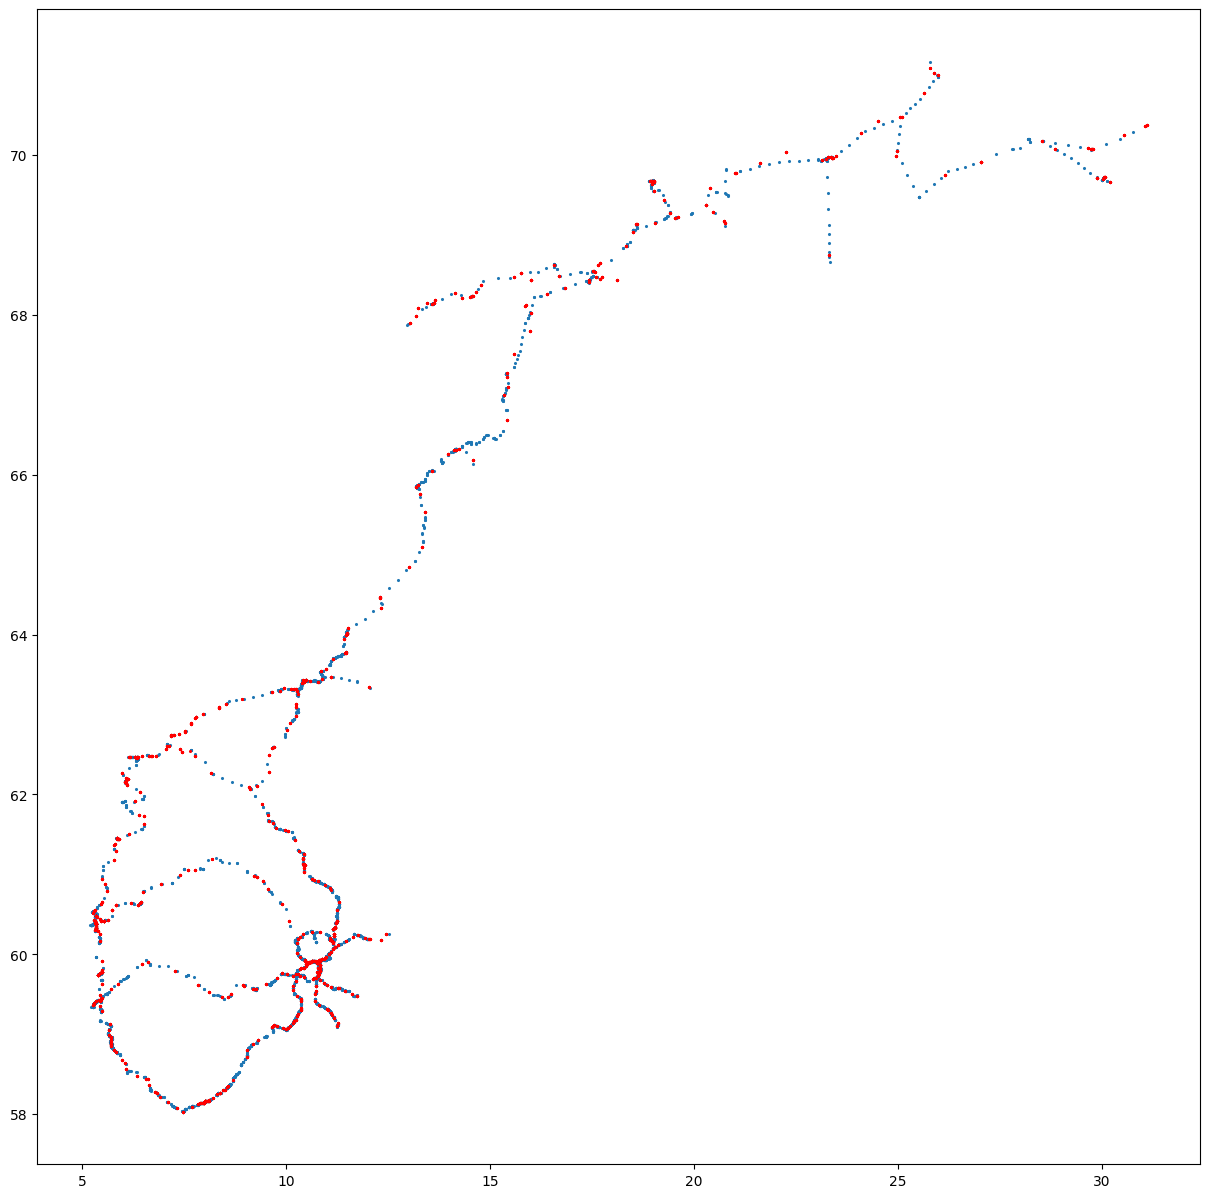

In [36]:
# Plot locations
plt.figure(figsize = (15,15))
plt.scatter(x = nodeLonList, y = nodeLatList, s = 1.5)
plt.scatter(x = trafficLonList, y = trafficLatList, s = 1.5, color = "red")
plt.show()
plt.close()

In [ ]:
def get_inverted_latlon(graph, nodes = None):
    pos = {}
    if nodes is not None:
        for i in nodes:
            data = graph.nodes[i]
            x = float(data['x'])
            y = float(data['y'])
            pos[i] = (x,y)
    else:
        nodes = [n for n in graph.nodes()]
        for i in nodes:
            data = graph.nodes[i]
            x = float(data['x'])
            y = float(data['y'])
            pos[i] = (x,y)

    return pos

In [15]:
len(node_df)

6944

In [93]:
BBox = (node_df.longitude.min(), node_df.longitude.max(), node_df.latitude.min(), node_df.latitude.max())
BBox

(58.03013944096029, 71.16783971273247, 5.204803268876829, 31.103518674750703)

In [ ]:
nx.edge_current_flow_betweenness_centrality_subset  
nx.edge_betweenness_centrality
nx.set_edge_attributes

In [18]:
volume_df.head(5)

,id,name,lat,lon,volume,year,month,volume1,volume2
0,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13023,2018,1,6512,6512
1,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13998,2018,2,6999,6999
2,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13878,2018,3,6939,6939
3,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14288,2018,4,7144,7144
4,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14669,2018,5,7334,7334


In [19]:
import networkx as nx
from shapely.geometry import Point, LineString

def assign_traffic_to_edges(traffic_df, G):
    for i, row in traffic_df.iterrows():
        traffic_point = Point(row['lon'], row['lat'])   # Get coordinates of Traffic Point
        closest_edge = None                             # Closest Edge = None ?? 
        closest_dist = float('inf')                     # Closest Distance = float('inf') ??
        for u, v, data in G.edges(data=True):           # 
            line = LineString(data['geometry'])         # Get line from nodes - data['geometry'] does not work
            dist = line.distance(traffic_point)         # Get distance on the edge ?
            if dist < closest_dist:
                closest_edge = (u, v)                   # Closest edge = coordinate u and coordinate v
                closest_dist = dist                     # C
            else:
                pass
        if closest_edge:
            u, v = closest_edge
            if u in G and v in G:
                length = nx.shortest_path_length(G, u, v, weight='length')
                for n1, n2 in zip(nx.shortest_path(G, u, v), nx.shortest_path(G, u, v)[1:]):
                    if 'traffic_flow' not in G[n1][n2]:
                        G[n1][n2]['traffic_flow'] = 0
                    if n1 == u:
                        G[n1][n2]['traffic_flow'] += row['traffic_volume'] * ((G.nodes[n1]['length'] - closest_dist) / length)
                    elif n2 == v:
                        G[n1][n2]['traffic_flow'] += row['traffic_volume'] * ((closest_dist) / length)
                    else:
                        G[n1][n2]['traffic_flow'] += row['traffic_volume']

In [20]:
assign_traffic_to_edges(volume_df, H)

KeyError: 'geometry'

In [38]:
import pandas as pd
import networkx as nx
from math import radians, cos, sin, asin, sqrt

# Load the NetworkX graph representing the road network
G = nx.read_gpickle('/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph_eRoad.pickle')

# Load the traffic count data
traffic_data = pd.read_excel("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/TrafficVolume/data/weekly_data_xl.xlsx")

# Remove the "Unnamed: 0" column
traffic_data.drop(columns='Unnamed: 0', inplace=True)

# Define the distance threshold for identifying traffic registration points on edges
dist_threshold = 0.05  # Distance threshold in degrees of latitude or longitude

traffic_data.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/networkx/readwrite/gpickle.py:109: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  return pickle.load(path)


,id,name,lat,lon,volume,year,month,volume1,volume2
0,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13023,2018,1,6512,6512
1,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13998,2018,2,6999,6999
2,41379V1201935,MESNADALSARMEN,61.115044,10.456279,13878,2018,3,6939,6939
3,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14288,2018,4,7144,7144
4,41379V1201935,MESNADALSARMEN,61.115044,10.456279,14669,2018,5,7334,7334


In [39]:
traffic_data = traffic_data.groupby('id')

In [40]:
traffic_data

In [35]:
# Loop through each edge in the NetworkX graph
for u, v, data in G.edges(data=True):
    # Extract the latitude and longitude coordinates of the starting and ending nodes of the edge
    lat1, lon1 = data['start_lat'], data['start_lon']
    lat2, lon2 = data['end_lat'], data['end_lon']
    
    # Calculate the distance between the starting and ending nodes of the edge using the Haversine formula
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    dist = 6367 * c  # Earth radius = 6367 km
    
    # Identify the traffic registration points that fall within the distance threshold of the edge
    traffic_points = traffic_data[(abs(traffic_data['lat'] - lat1) < dist_threshold) & 
                                  (abs(traffic_data['lon'] - lon1) < dist_threshold)]

KeyError: 'start_lat'

In [ ]:
# Loop through each edge in the NetworkX graph
for u, v, data in G.edges(data=True):
    # Extract the latitude and longitude coordinates of the starting and ending nodes of the edge
    lat1, lon1 = data['start_lat'], data['start_lon']
    lat2, lon2 = data['end_lat'], data['end_lon']
    
    # Calculate the distance between the starting and ending nodes of the edge using the Haversine formula
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    dist = 6367 * c  # Earth radius = 6367 km
    
    # Identify the traffic registration points that fall within the distance threshold of the edge
    traffic_points = traffic_data[(abs(traffic_data['lat'] - lat1) < dist_threshold) & 
                                  (abs(traffic_data['lon'] - lon1) < dist_threshold)]
    
    if len(traffic_points) == 0:
        # If there are no traffic counts between the starting and ending nodes of the edge, assume the traffic volume is zero
        data['traffic_volume'] = 0
    elif len(traffic_points) == 1:
        # If there is only one traffic count between the starting and ending nodes of the edge, assign the traffic volume to the entire edge
        data['traffic_volume'] = traffic_points.iloc[0]['volume']
    else:
        # If there are multiple traffic counts between the starting and ending nodes of the edge, use linear interpolation to estimate the traffic volume on each segment of the edge
        total_volume = traffic_points['volume'].sum()
        segment_lengths = [dist * (traffic_points.iloc[0]['lat'] - lat1) / (lat2 - lat1)]
        for i in range(1, len(traffic_points)):
            segment_lengths.append(dist * (traffic_points.iloc[i]['lat'] - traffic_points.iloc[i-1]['lat']) / (lat2 - lat1))
        segment_lengths.append(dist * (lat2 - traffic_points.iloc[-1]['lat']) / (lat2 - lat1))
        segment_volumes = [volume * length / total_volume for volume, length in zip(traffic_points['volume'], segment_lengths)]
        segment_volume_dict = {}
        for i, segment in enumerate(nx.utils.pairwise([u] + [n['id'] for n in data['geometry']] + [v])):
            segment_volume_dict[segment] = segment_volumes[i]
        data['traffic_volume'] = segment_volume_dict


In [47]:
node_df.head()

,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.160,0,0,0,POINT (11.127465806112035 60.78620456025842)
1,155201,155201,11.127185,60.786429,142.700,0,0,0,POINT (11.127184981853482 60.78642854398455)
2,155273,155273,11.127535,60.786334,142.705,0,0,0,POINT (11.127534712389643 60.78633428345484)
3,155289,155289,11.127400,60.786416,142.543,0,0,0,POINT (11.127399824588059 60.786415782679235)
4,155971,155971,11.993829,60.189189,155.408,0,0,0,POINT (11.993829462815306 60.189188517538796)


In [16]:
df1 = volume_df[["lat", "lon"]]
df2 = node_df[["latitude", "longitude"]]

In [19]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Define map object
#latitude = 60.4720
longitude = 8.4689
zoom_level = 5
map = folium.Map(location=[latitude, longitude], zoom_start=zoom_level)

# Plot coordinates from df1
for index, row in df1.head().iterrows():
    folium.Marker([row['lat'], row['lon']]).add_to(map)

# Plot coordinates from df2 using MarkerCluster
marker_cluster = MarkerCluster().add_to(map)
for index, row in df2.head().iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map
display(map)


In [20]:
import numpy as np
from scipy.spatial.distance import cdist
import geopandas as gpd
import networkx as nx

# load road network
#G = nx.read_shp('path/to/your/road/network.shp')

# create road nodes array with latitude and longitude information
road_nodes = np.array([(node, data['geometry'].coords[0][0], data['geometry'].coords[0][1])
                      for node, data in H.nodes(data=True)])

In [21]:
road_nodes

array([[1.55191000e+05, 1.11274658e+01, 6.07862046e+01],
       [1.55201000e+05, 1.11271850e+01, 6.07864285e+01],
       [1.55273000e+05, 1.11275347e+01, 6.07863343e+01],
       ...,
       [1.85491800e+06, 2.33147817e+01, 6.87816537e+01],
       [1.85491900e+06, 1.58274189e+01, 6.78116734e+01],
       [1.85492000e+06, 2.33177438e+01, 6.87233113e+01]])

In [24]:
# convert traffic data to numpy array
traffic_points = volume_df[['lon', 'lat', 'volume']].values

In [25]:
traffic_points

array([[1.0456279e+01, 6.1115044e+01, 1.3023000e+04],
       [1.0456279e+01, 6.1115044e+01, 1.3998000e+04],
       [1.0456279e+01, 6.1115044e+01, 1.3878000e+04],
       ...,
       [6.0428870e+00, 6.2159291e+01, 9.6300000e+03],
       [6.0428870e+00, 6.2159291e+01, 9.6450000e+03],
       [6.0428870e+00, 6.2159291e+01, 8.4850000e+03]])

In [26]:
dist_matrix = cdist(traffic_points[:, :2], road_nodes[:, 1:], metric='euclidean')
dist_matrix

array([[ 0.74741361,  0.74706289,  0.74741843, ..., 14.97057101,
         8.58452037, 14.94332653],
       [ 0.74741361,  0.74706289,  0.74741843, ..., 14.97057101,
         8.58452037, 14.94332653],
       [ 0.74741361,  0.74706289,  0.74741843, ..., 14.97057101,
         8.58452037, 14.94332653],
       ...,
       [ 5.266717  ,  5.2663875 ,  5.26674971, ..., 18.49794677,
        11.29984478, 18.47990908],
       [ 5.266717  ,  5.2663875 ,  5.26674971, ..., 18.49794677,
        11.29984478, 18.47990908],
       [ 5.266717  ,  5.2663875 ,  5.26674971, ..., 18.49794677,
        11.29984478, 18.47990908]])

In [27]:
# find closest road node for each traffic point
min_indices = np.argmin(dist_matrix, axis=1)
min_distances = np.min(dist_matrix, axis=1)

In [29]:
min_distances

array([0.00427378, 0.00427378, 0.00427378, ..., 0.01479752, 0.01479752,
       0.01479752])

In [30]:
total_edge_length = sum([data['length'] for u, v, data in H.edges(data=True)])

In [31]:
total_edge_length

8241825.174354981

In [32]:
# assign traffic flow to edges based on closest road node
for i, point in enumerate(traffic_points):
    node_id = road_nodes[min_indices[i], 0]
    edges = H.edges(node_id, data=True)
    total_distance = sum([data['length'] for u, v, data in edges])
    for u, v, data in edges:
        edge_weight = data['length']
        traffic_flow = point[2] * (edge_weight / total_distance)
        if 'traffic_flow' not in data:
            data['traffic_flow'] = traffic_flow
        else:
            data['traffic_flow'] += traffic_flow

In [34]:
data['traffic_flow']

4627.373240186492

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import geopandas as gpd
import networkx as nx

# load road network
#G = nx.read_shp('path/to/your/road/network.shp')

# create road nodes array with latitude and longitude information
road_nodes = np.array([(node, data['geometry'].coords[0][0], data['geometry'].coords[0][1])
                      for node, data in H.nodes(data=True)])

# load traffic data
#traffic_data = gpd.read_file('path/to/your/traffic/data.shp')

# convert traffic data to numpy array
traffic_points = volume_df[['lon', 'lat', 'volume']].values

# calculate distance matrix between traffic points and road nodes
dist_matrix = cdist(traffic_points[:, :2], road_nodes[:, 1:], metric='euclidean')

# find closest road node for each traffic point
min_indices = np.argmin(dist_matrix, axis=1)
min_distances = np.min(dist_matrix, axis=1)

# calculate total length of all edges in the graph
total_edge_length = sum([data['length'] for u, v, data in H.edges(data=True)])

# assign traffic flow to edges based on closest road node
for i, point in enumerate(traffic_points):
    node_id = road_nodes[min_indices[i], 0]
    edges = H.edges(node_id, data=True)
    total_distance = sum([data['length'] for u, v, data in edges])
    for u, v, data in edges:
        edge_weight = data['length']
        traffic_flow = point[2] * (edge_weight / total_distance)
        if 'traffic_flow' not in data:
            data['traffic_flow'] = traffic_flow
        else:
            data['traffic_flow'] += traffic_flow

In [37]:
node_df.head()

,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.160,0,0,0,POINT (11.127465806112035 60.78620456025842)
1,155201,155201,11.127185,60.786429,142.700,0,0,0,POINT (11.127184981853482 60.78642854398455)
2,155273,155273,11.127535,60.786334,142.705,0,0,0,POINT (11.127534712389643 60.78633428345484)
3,155289,155289,11.127400,60.786416,142.543,0,0,0,POINT (11.127399824588059 60.786415782679235)
4,155971,155971,11.993829,60.189189,155.408,0,0,0,POINT (11.993829462815306 60.189188517538796)


In [39]:
type(node_df['geometry'])

pandas.core.series.Series

In [38]:
edge_df.head()

,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
0,155191,155273,138086,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.017585,15.291208,15.291208,155191,155273,-0.03,0.03,NaN
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,0,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.743882,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]",LINESTRING (11.127465806112035 60.786204560258...
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.859300,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]",LINESTRING (11.127184981853482 60.786428543984...
3,155201,155289,138110,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.013559,11.790339,11.790339,155289,155201,0.013,0.013,NaN
4,155201,351618,"[2168673, 138022, 362732, 363598, 2168670]",False,E6,E6,0,0,0,0,0,110,"[0.025416070719352715, 0.16287845422361258, 0....",377.468769,"[65.06593976101533, 259.6613038347447, 4.91549...","[155200, 351618, 1854868, 351165, 351166]","[155200, 155201, 1854868, 351165, 351166]","[0.028, 0.056, 0.025, 0.053, 0.042]","[0.028, 0.056, 0.025, 0.053, 0.042]",LINESTRING (11.125266280578165 60.789677274131...


In [42]:
import geopandas as gpd

# Convert the nodes dataframe to a GeoDataFrame
nodes_gdf = gpd.GeoDataFrame(node_df, geometry='geometry')

# Convert the edges dataframe to a GeoDataFrame
edges_gdf = gpd.GeoDataFrame(edge_df, geometry='geometry')

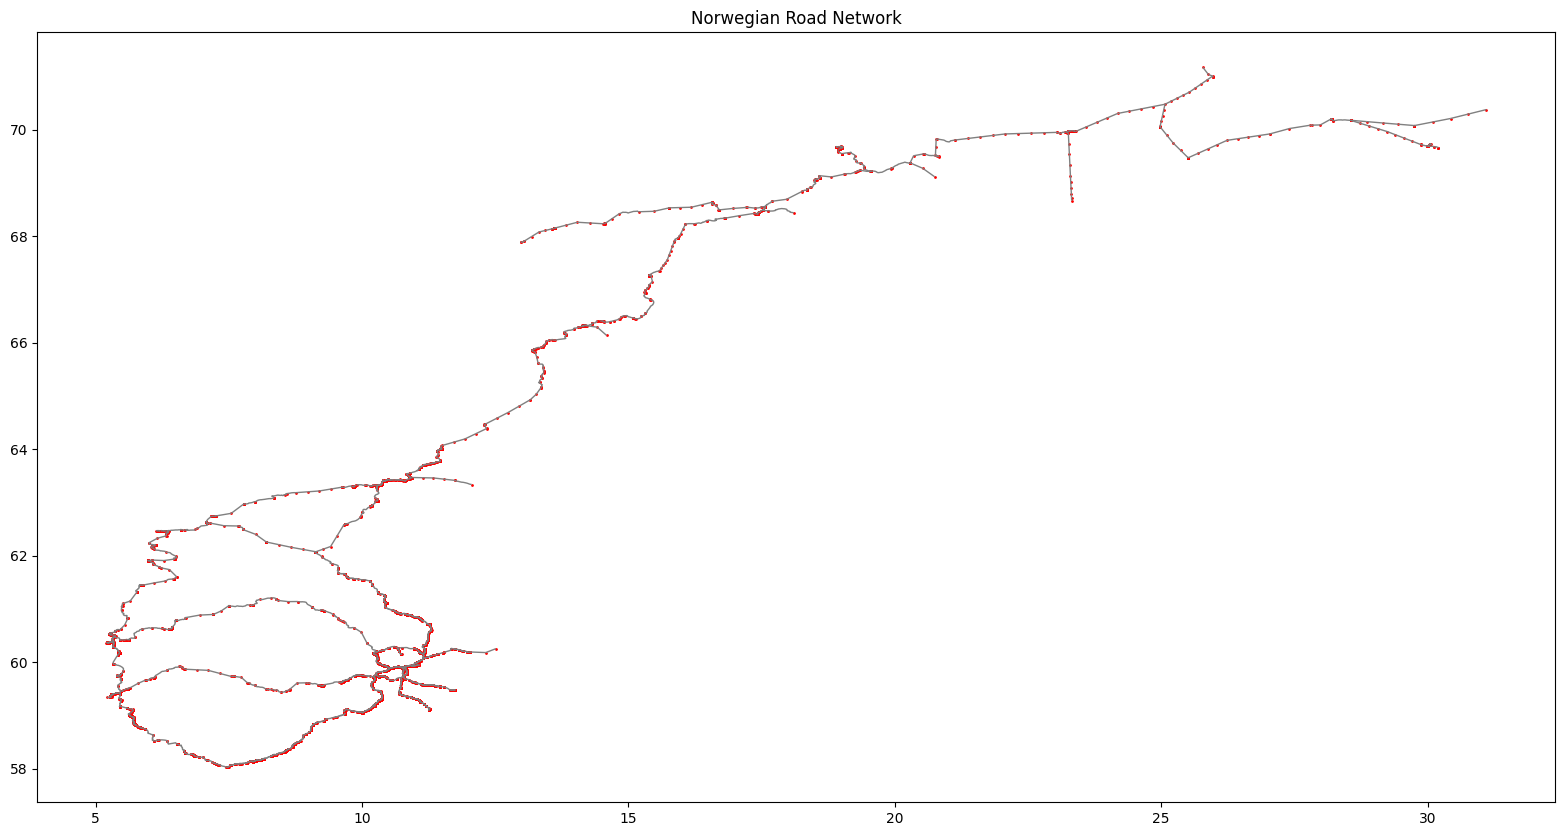

In [99]:
import geopandas as gpd

# Convert the nodes and edges dataframe to a GeoDataFrame
nodes_gdf = gpd.GeoDataFrame(node_df, geometry='geometry')
edges_gdf = gpd.GeoDataFrame(edge_df, geometry='geometry')

# Create a new plot
ax = edges_gdf.plot(color='gray', linewidth=1, figsize=(30, 10))

# Plot the nodes on top of the edges
nodes_gdf.plot(ax=ax, markersize=1, color='red')

# Add a title to the plot
ax.set_title('Norwegian Road Network')

# Show the plot
plt.show()
